[View in Colaboratory](https://colab.research.google.com/github/tchappui/heia-course-chemical-process-intensification/blob/master/Part1/S04_Exercise3.ipynb)

# Exercise 3

## Import the needed libraries

In [0]:
# vectors and linear algebra
import numpy as np

# visualization tools
import matplotlib.pyplot as plt

# solvers to integrate ordinary differential equations
import scipy.integrate as solvers

## Define the constants

In [0]:
R = 0.0821 # L * atm/mol * K

k = 10 # L2/mol2*s
Vdot0 = 4 # L/s
yA0 = 0.5 # -
p0 = 16.4 # atm
T0 = 500 # K
epsilon = -0.5 # -

CA0 = yA0 *  p0 / (R * T0) # mol/L
CB0 = CA0 # mol/L
CC0 = 0 # mol/L

FA0 = CA0 * Vdot0 # mol/L * L/s = mol/s
FB0 = CB0 * Vdot0 # mol/L * L/s = mol/s
FC0 = 0 # mol/s

## Define the equations to solve

In [0]:
def balances(variables, V, FA0, Vdot0, epsilon, k):
    FA, FB, FC = variables
    
    X = 1 - FA / FA0
    Vdot = Vdot0 * (1 + epsilon * X)
    
    CA = FA / Vdot
    CB = FB / Vdot
    CC = FC / Vdot

    r = k * CA**2 * CB

    RA = -2 * r
    RB = -r
    RC = r

    dFA = RA
    dFB = RB
    dFC = RC

    return dFA, dFB, dFC

## Define the initial conditions and the integration domain

In [0]:
initial_conditions = [FA0, FB0, FC0] # mol/s
V = np.arange(0, 250.1, 0.1)

## Call the solver to find a solution

In [0]:
results = solvers.odeint(
    balances, 
    initial_conditions, 
    V, 
    (FA0, Vdot0, epsilon, k)
)

In [0]:
FA = results[:,0]
FB = results[:,1]
FC = results[:,2]

X = 1 - FA / FA0
Vdot = Vdot0 * (1 + epsilon * X)

CA = FA / Vdot
CB = FB / Vdot
CC = FC / Vdot

## Visualization of the results

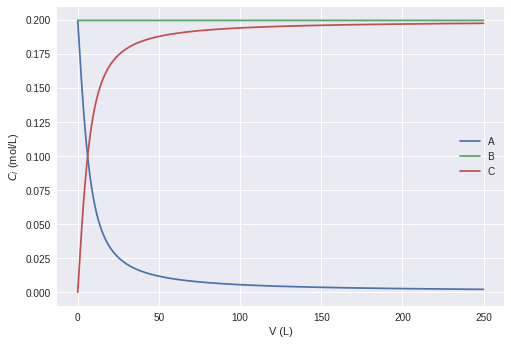

In [28]:
plt.plot(V, CA, V, CB, V, CC)
plt.xlabel('V (L)')
plt.ylabel('$C_{i}$ (mol/L)')
plt.legend(['A', 'B', 'C'])
plt.show()